In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, GlobalAveragePooling2D,MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model, Input, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
import cv2
import matplotlib.pyplot as plt

# Extracting Data from the uploaded Zipfile

In [ ]:
from zipfile import ZipFile
file_name = 'archive.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Auto Labelling Data 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (150,150),
    class_mode = 'binary',
    batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
    'test',
    target_size = (150,150),
    class_mode = 'binary',
    batch_size = 128
)


Found 1513 images belonging to 2 classes.
Found 968 images belonging to 2 classes.


# View the Data 

Chest scan of a person who has COVID

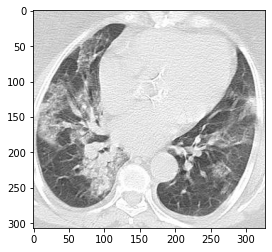

In [ ]:
img_arr = cv2.imread('/content/train/COVID/Covid (1003).png')
plt.imshow(img_arr)

Chest scan of a Healthy person

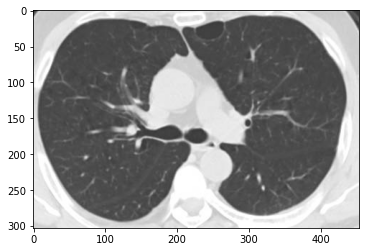

In [ ]:
img_arr = cv2.imread('/content/train/non-COVID/Non-Covid (1005).png')
plt.imshow(img_arr)

# Model

In [ ]:
model_2 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Dropout(0.3),

                                      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Dropout(0.3),

                                      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Dropout(0.3),

                                      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Dropout(0.3),

                                      tf.keras.layers.Flatten(),

                                      tf.keras.layers.Dense(256, activation = 'relu'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.Dropout(0.25),
                                      tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator
)

Epoch 1/15
12/12 [==============================] - 15s 1s/step - loss: 0.6809 - accuracy: 0.7436 - val_loss: 1.2424 - val_accuracy: 0.5000
Epoch 2/15
12/12 [==============================] - 10s 850ms/step - loss: 0.3604 - accuracy: 0.8546 - val_loss: 2.8455 - val_accuracy: 0.5000
Epoch 3/15
12/12 [==============================] - 10s 847ms/step - loss: 0.2665 - accuracy: 0.8890 - val_loss: 4.2976 - val_accuracy: 0.5000
Epoch 4/15
12/12 [==============================] - 10s 864ms/step - loss: 0.2258 - accuracy: 0.9061 - val_loss: 6.0002 - val_accuracy: 0.5000
Epoch 5/15
12/12 [==============================] - 10s 856ms/step - loss: 0.2122 - accuracy: 0.9154 - val_loss: 6.5627 - val_accuracy: 0.5000
Epoch 6/15
12/12 [==============================] - 10s 850ms/step - loss: 0.1993 - accuracy: 0.9134 - val_loss: 7.1469 - val_accuracy: 0.5000
Epoch 7/15
12/12 [==============================] - 10s 858ms/step - loss: 0.1757 - accuracy: 0.9260 - val_loss: 6.8482 - val_accuracy: 0.5000
Ep

As it is clearly visible overfitting has occured during the model training. The reason I think this has happened is due to the small size of the validation dataset and hence believe a larger dataset should solve this problem

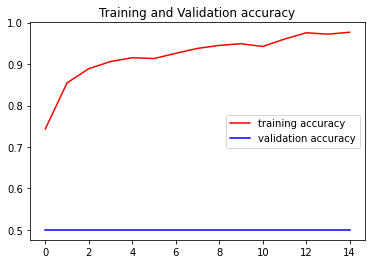

<Figure size 432x288 with 0 Axes>

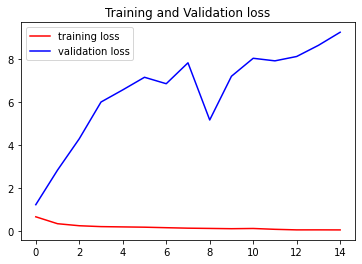

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
